In [102]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
%ls Data

high.csv  highp_finalresults.csv  low.csv  lowp_finalresults.csv


# Formatting

In [103]:
# Loads data (Fills NaN values as 0 for simplicity)
data=pd.read_csv("./Data/highp_finalresults.csv",sep = ',',
                 engine = 'python',skipinitialspace = True,na_values = 'NaN ').fillna(0)
# Each row, (for now is a different planet)
# Adds column named n_planet___ it is later going to be summed
data["n_planets"] = 1
# Shows data for verification
print(data.shape)
#data['rplanet(i)/radtie'][26720]
data.head()

(32465, 19)


,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,n_planets
0,0,199993,20000001.0,0.030237,0.004911,1.904923,1.902982,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1
1,0,199993,20000001.0,0.818832,0.000238,1.642056,1.815005,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1
2,0,199993,20000001.0,2.124022,0.000000,1.786051,1.865992,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1
3,0,199993,20000001.0,5.123330,0.000000,0.843418,1.453885,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1
4,0,199993,20000001.0,6.932367,0.000000,0.477013,1.203113,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1


In [104]:
# Selects useful planet data only to produce: number of planets, total mass of planets. 
# Identity of system is conserved
planet_data = data[['ident','emepla(i)/emet','n_planets']]
# Shows data
print(planet_data.shape)
planet_data.head(5)

(32465, 3)


,ident,emepla(i)/emet,n_planets
0,0,1.904923,1
1,0,1.642056,1
2,0,1.786051,1
3,0,0.843418,1
4,0,0.477013,1


In [105]:
# Selects system data only. 
# System columns corresponding to initial condition
# According to repository readme, we have to drop: a(i),emegas(i),emepla(i)/emed,rplanet(i)/radtie
system_data = data.drop(['a(i)','emegas(i)','emepla(i)/emet','rplanet(i)/radtie','n_planets'],1)
# Shows data
print(system_data.shape)
system_data.head(15)

(32465, 14)


,ident,it,t,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
1,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
2,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
3,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
4,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
5,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
6,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
7,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
8,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
9,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0


In [106]:
# System data is repeated as rows represent planets
system_data = system_data.groupby(system_data['ident']).mean()
# From planets data it is only necesary the total data (total mass, total number of planets)
planet_data = planet_data.groupby(planet_data['ident']).sum()
print(planet_data.head())
print(system_data.head())


       emepla(i)/emet  n_planets
ident                           
0            8.136583         11
1            2.827470         13
2            7.979543          9
3            6.944855         18
4            3.193649         10
           it           t       emestar         rc      qest   sigmag_0  \
ident                                                                     
0      199993  20000001.0  4.368174e+32  59.882370  1.110726  51.287674   
1      198840  20000001.0  2.095099e+32  40.040195  3.201758  16.765976   
2      199995  20000001.0  5.354890e+32  40.647163  1.965345  67.644768   
3      199755  20000001.0  3.614768e+32  29.539343  9.568532  16.213096   
4      199319  20000001.0  2.885875e+32  61.195038  2.230675  15.866622   

        emed  gama  apert  fpert  constmigI    emetal       taugas  
ident                                                               
0      0.130   1.0    0.3    1.0        0.1  0.077070  9268935.000  
1      0.019   1.0    0.3    1.0    

In [107]:
# Concatenate two data frames to obtain final formatted data
data = pd.concat([system_data,planet_data], axis=1).reset_index()
# Shows data
print(data.shape)
data.tail()


(2770, 16)


,ident,it,t,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,emepla(i)/emet,n_planets
2765,2968,131434,20000001.0,6.264712e+32,57.281631,10.953638,7.760851,0.0180,1.0,0.3,1.0,0.1,-0.446968,6626384.50,0.400977,7
2766,2969,198175,20000001.0,2.237603e+32,50.125561,3.832385,10.134950,0.0180,1.0,0.3,1.0,0.1,-0.057743,2354191.25,2.108401,17
2767,2971,174606,20000001.0,2.363279e+32,48.088692,7.702361,5.689376,0.0093,1.0,0.3,1.0,0.1,-0.038426,3613139.75,0.406267,5
2768,2973,199881,20000001.0,5.544265e+32,43.687119,3.474783,34.838437,0.0470,1.0,0.3,1.0,0.1,-0.170853,8957744.00,9.160190,10
2769,2974,199875,20000001.0,4.092467e+32,50.698605,6.853647,9.907135,0.0180,1.0,0.3,1.0,0.1,0.408212,7710610.50,8.499508,9


# Looking for relations (total mass of planets)
Planet mass is presented as logarithm as always

In [108]:
print(np.where(data.keys()=='n_planets'),np.where(data.keys()=='emepla(i)/emet'))
%matplotlib inline

(array([15]),) (array([14]),)


ident


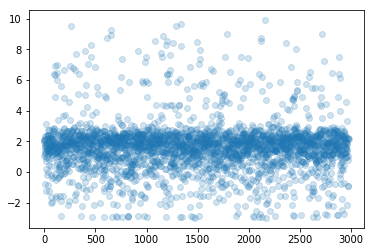

In [109]:
raw = data.values.T
plt.scatter((raw[0]),np.log(raw[14]),alpha = 0.2)
print(data.keys()[0])
plt.show()
# unimportant parameter

it


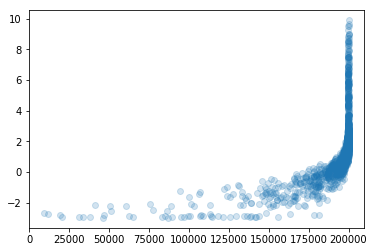

In [110]:
plt.scatter((raw[1]),np.log(raw[14]),alpha = 0.2)
print(data.keys()[1])
plt.show()
# goes as 1/x^n

t
STD is:  0.0


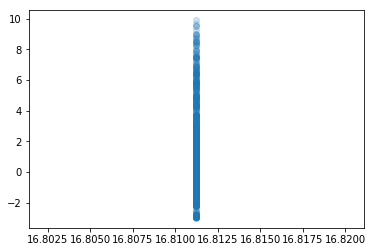

In [111]:
plt.scatter(np.log(raw[2]),np.log(raw[14]),alpha = 0.2)
print(data.keys()[2])
print("STD is: ",raw[2].std())
plt.show()
# Unimportant parameter, every system has the same value for this parameter

emestar


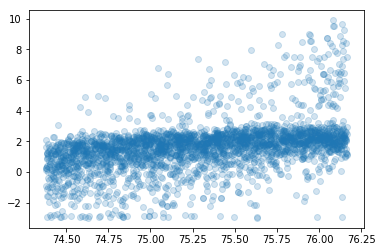

In [112]:
plt.scatter(np.log(raw[3]),np.log(raw[14]),alpha = 0.2)
print(data.keys()[3])
plt.show()
# Assume linear

rc


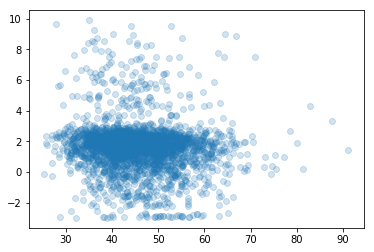

In [113]:
plt.scatter((raw[4]),np.log(raw[14]),alpha = 0.2)
print(data.keys()[4])
plt.show()
# Assume linear

qest


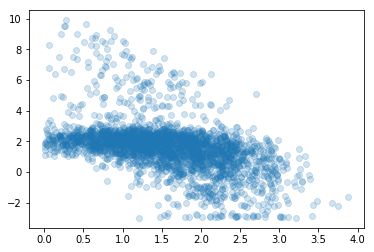

In [114]:
plt.scatter(np.log(raw[5]),np.log(raw[14]),alpha = 0.2)
print(data.keys()[5])
plt.show()
# Assume linear

sigmag_0


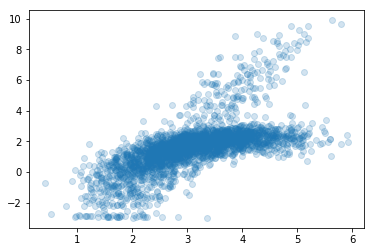

In [115]:
plt.scatter(np.log(raw[6]),np.log(raw[14]), alpha = 0.2)
print(data.keys()[6])
plt.show()
# Assume logarithmic or something like that (linear relation is a small bias)

emed


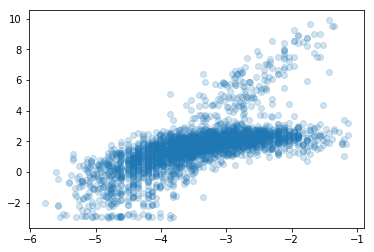

In [116]:
plt.scatter(np.log(raw[7]),np.log(raw[14]), alpha = 0.2)
print(data.keys()[7])
plt.show()
# Assume logarithmic or something like that (linear relation is a small bias)

gama
STD is:  0.0


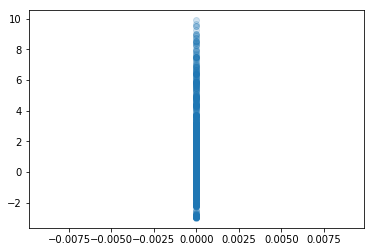

In [117]:
plt.scatter(np.log(raw[8]),np.log(raw[14]), alpha = 0.2)
print(data.keys()[8])
print("STD is: ",raw[8].std())
plt.show()
# Unimportant parameter, every system has the same value for this parameter

apert
STD is:  0.0


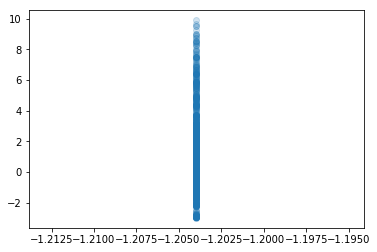

In [118]:
plt.scatter(np.log(raw[9]),np.log(raw[14]), alpha = 0.2)
print(data.keys()[9])
print("STD is: ",raw[9].std())
plt.show()
# Unimportant parameter, every system has the same value for this parameter

fpert
STD is:  0.0


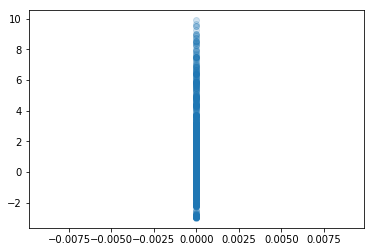

In [119]:
plt.scatter(np.log(raw[10]),np.log(raw[14]), alpha = 0.2)
print(data.keys()[10])
print("STD is: ",raw[10].std())
plt.show()
# Unimportant parameter, every system has the same value for this parameter


constmigI
STD is:  2.18633501151e-17


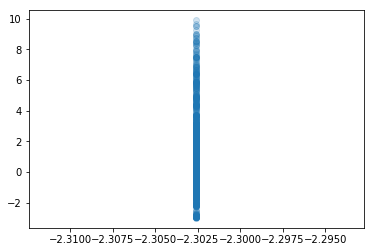

In [120]:
plt.scatter(np.log(raw[11]),np.log(raw[14]), alpha = 0.2)
print(data.keys()[11])
print("STD is: ",raw[11].std())
plt.show()
# Unimportant parameter, every system has the same value for this parameter

emetal


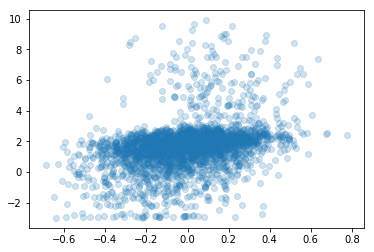

In [121]:
plt.scatter((raw[12]),np.log(raw[14]), alpha = 0.2)
print(data.keys()[12])
plt.show()
# ?????

taugas


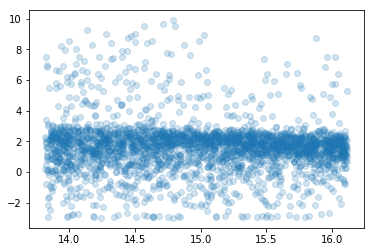

In [122]:
plt.scatter(np.log(raw[13]),np.log(raw[14]), alpha = 0.2)
print(data.keys()[13])
plt.show()
# ?????

# There is a relation between sigma_0 and emed!!!

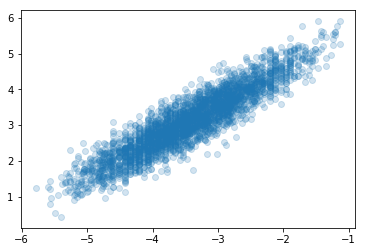

Index(['sigmag_0', 'emed'], dtype='object')


In [123]:
plt.scatter(np.log(raw[7]),np.log(raw[6]), alpha = 0.2)
plt.show()
print(data.keys()[[6,7]])
# clear linear relation!
# This means that we can assume 
# the same relation between total mass and sigma0 and the one between total mass and emed

# Extremely unimportant parameters

In [124]:
# 0,2,8,9,10,11 are unimportant parameters
# Data for the first point
print(data.keys()[[0,2,8,9,10,11,-1]])
data = data.drop(data.keys()[[0,2,8,9,10,11,-1]],1)
data.head()

Index(['ident', 't', 'gama', 'apert', 'fpert', 'constmigI', 'n_planets'], dtype='object')


,it,emestar,rc,qest,sigmag_0,emed,emetal,taugas,emepla(i)/emet
0,199993,4.368174e+32,59.882370,1.110726,51.287674,0.130,0.077070,9268935.000,8.136583
1,198840,2.095099e+32,40.040195,3.201758,16.765976,0.019,-0.092791,3525593.500,2.827470
2,199995,5.354890e+32,40.647163,1.965345,67.644768,0.079,0.514770,9390406.000,7.979543
3,199755,3.614768e+32,29.539343,9.568532,16.213096,0.010,0.328146,1644710.625,6.944855
4,199319,2.885875e+32,61.195038,2.230675,15.866622,0.042,-0.220031,9468353.000,3.193649


In [25]:
data['emepla(i)/emet'] = np.log(data['emepla(i)/emet']+1e-5)
data['emestar'] = np.log(data['emestar']+1e-5)
data['sigmag_0'] = np.log(data['sigmag_0']+1e-5)

In [26]:
data.head()

,it,emestar,rc,qest,sigmag_0,emed,gama,emetal,taugas,emepla(i)/emet
0,199993,75.157068,59.882370,1.110726,3.937451,0.130,1.0,0.077070,9268935.000,2.096372
1,198840,74.422324,40.040195,3.201758,2.819352,0.019,1.0,-0.092791,3525593.500,1.039386
2,199995,75.360733,40.647163,1.965345,4.214270,0.079,1.0,0.514770,9390406.000,2.076882
3,199755,74.967751,29.539343,9.568532,2.785820,0.010,1.0,0.328146,1644710.625,1.938003
4,199319,74.742551,61.195038,2.230675,2.764218,0.042,1.0,-0.220031,9468353.000,1.161167


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

def efficiency(y_predicted, y_test):
    return np.exp(-0.5*(sum((y_predicted-y_test)**2)/(len(y_test)*(y_test.std()**2))))

Xdata = data[data.keys()[:-1]].values
Ydata = data[data.keys()[-1]].values
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.25, random_state=52)
uniform = []
distance = []
for i in range(1,20):
    neigh = KNeighborsRegressor(n_neighbors=i, weights = 'uniform' )
    neigh.fit(X_train, y_train)
    y_predicted = neigh.predict(X_test)
    epsilon = efficiency(y_predicted,y_test)
    uniform.append(epsilon)
    neigh = KNeighborsRegressor(n_neighbors=i, weights = 'distance' )
    neigh.fit(X_train, y_train)
    y_predicted = neigh.predict(X_test)
    epsilon = efficiency(y_predicted,y_test)
    distance.append(epsilon)
uniform = np.array(uniform)
distance = np.array(distance)

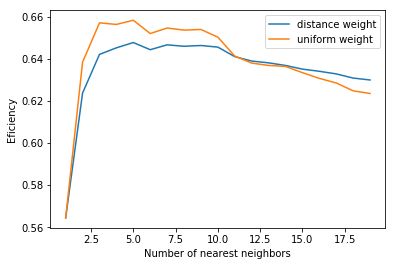

In [99]:
plt.plot(range(1,20),distance, label = 'distance weight')
plt.plot(range(1,20),uniform, label = 'uniform weight')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Eficiency')
plt.legend()

In [100]:
range(1,20)[np.argmax(uniform)]

5

0.32604408286732339

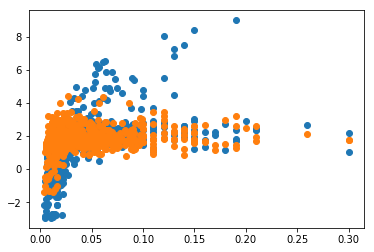

In [76]:
plt.plot(Xdata[train_size:].T[5], Ydata[train_size:],marker =  'o', linewidth = 0 )
plt.plot(Xdata[train_size:].T[5],y,marker =  'o', linewidth = 0 )

# Principal component analysis
As the README.md says, there are 4 non importatn parameters for each system, 5 if we count the identity parameter.
For this reason, we decide to reduce de dimensionality of this system by 5, using PCA form scikit learn.

In [ ]:
# Corresponding imports from scikit learn
from sklearn.decomposition import PCA
# Number of principal components to take
ndim = 19-5
